In [35]:
import pandas as pd
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_validate, cross_val_score, validation_curve

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
blood_transfusion = pd.read_csv("../datasets/blood_transfusion.csv")
target_name = "Class"
data = blood_transfusion.drop(columns=target_name)
target = blood_transfusion[target_name]

In [3]:
target.unique()

array(['donated', 'not donated'], dtype=object)

In [4]:
target.value_counts()

not donated    570
donated        178
Name: Class, dtype: int64

### Dummy Classifier

In [5]:
dummy = DummyClassifier(strategy="most_frequent")

cv_results = cross_validate(dummy, data, target, cv=10)
cv_results["test_score"].mean()

0.762054054054054

In [6]:
cv_results = cross_validate(dummy, data, target, cv=10, scoring="balanced_accuracy")
cv_results["test_score"].mean()

0.5

### KNN Clasifier

In [7]:
model = make_pipeline(StandardScaler(), KNeighborsClassifier())
cv_results = cross_validate(model, data, target, cv=10, return_train_score=True)
cv_results["test_score"].mean()

0.6527027027027026

/home/enrique/anaconda3/lib/python3.7/site-packages/seaborn/relational.py:823: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  line, = ax.plot([], [], **kws)
/home/enrique/anaconda3/lib/python3.7/site-packages/seaborn/relational.py:834: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  line, = ax.plot(x, y, **kws)


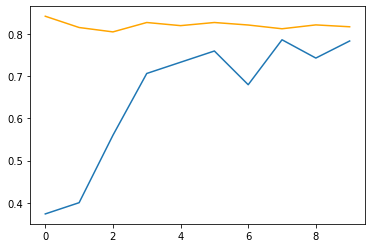

In [8]:
sns.lineplot(range(10),cv_results["test_score"])
sns.lineplot(range(10),cv_results["train_score"], c="orange")

In [9]:
cv_results

{'fit_time': array([0.02180982, 0.01348996, 0.01484251, 0.01377869, 0.01359439,
        0.01382828, 0.01359987, 0.01330256, 0.01331615, 0.0135591 ]),
 'score_time': array([0.01796556, 0.01484632, 0.01464152, 0.01456714, 0.01472878,
        0.01454759, 0.01578236, 0.01491141, 0.01453495, 0.01437736]),
 'test_score': array([0.37333333, 0.4       , 0.56      , 0.70666667, 0.73333333,
        0.76      , 0.68      , 0.78666667, 0.74324324, 0.78378378]),
 'train_score': array([0.84249629, 0.81575037, 0.80534918, 0.82763744, 0.82020802,
        0.82763744, 0.82169391, 0.8127786 , 0.82195846, 0.81750742])}

In [10]:
cv_results = cross_val_score(model, data, target, cv=10)
cv_results

array([0.37333333, 0.4       , 0.56      , 0.70666667, 0.73333333,
       0.76      , 0.68      , 0.78666667, 0.74324324, 0.78378378])

In [11]:
model = make_pipeline(KNeighborsClassifier())
cv_results = cross_validate(model, data, target, cv=10)
cv_results["test_score"].mean()

0.6673333333333333

### Hyperparameter

In [39]:
n_neighbors = [1, 2, 5, 10, 20, 50, 100, 200, 500]
train_scores, test_scores = validation_curve(model, data, target, param_name="kneighborsclassifier__n_neighbors" ,param_range=n_neighbors,
                cv=5, n_jobs=-1)

Text(0.5, 1.0, 'Validation curve of K-nearest neighbors')

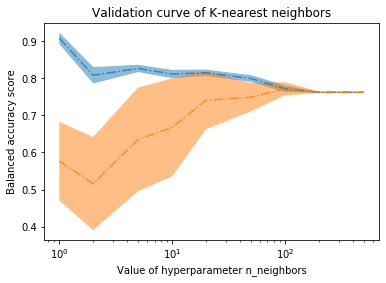

In [46]:
_, ax = plt.subplots()
for name, scores in zip(
    ["Training score", "Testing score"], [train_scores, test_scores]
):
    ax.plot(
        n_neighbors, scores.mean(axis=1), linestyle="-.", label=name,
        alpha=0.8)
    ax.fill_between(
        n_neighbors, scores.mean(axis=1) - scores.std(axis=1),
        scores.mean(axis=1) + scores.std(axis=1),
        alpha=0.5, label=f"std. dev. {name.lower()}")

ax.set_xticks(n_neighbors)
ax.set_xscale("log")
ax.set_xlabel("Value of hyperparameter n_neighbors")
ax.set_ylabel("Balanced accuracy score")
ax.set_title("Validation curve of K-nearest neighbors")